In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense

In [2]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

--2023-08-27 13:30:59--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  17.8MB/s    in 11s     

2023-08-27 13:31:10 (7.57 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [3]:
#the function that loop deirect
import os
import re
import pandas as pd

In [7]:
#function to load the data
def load_data(directory):
    data ={}
    data['review']=[]
    data['sentiment']=[]
    for file_path in os.listdir(directory):
        with open(os.path.join(directory,file_path),'r') as file :
            data['review'].append(file.read())
        result = re.search(r'\d+_(\d+)\.txt$',file_path)
        data['sentiment'].append(int(result.group(1)))
    return pd.DataFrame.from_dict(data)

In [24]:
#load training data
train_data = load_data('aclImdb/train/pos')
train_data = train_data.append(load_data('aclImdb/train/neg'))

#load testing data
test_data = load_data('aclImdb/test/pos')
test_data = test_data.append(load_data('aclImdb/test/neg'))

#print the frist 5 row of the train_dat DataFrame:
print(train_data.head())

<ipython-input-24-50fe04208ef2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(load_data('aclImdb/train/neg'))


                                              review  sentiment
0  Nicely and intelligently played by the two you...         10
1  This will be somewhat short. First, don't list...          9
2  by saying that,I mean that this is not a well ...         10
3  Every time this film is on the BBC somebody in...          8
4  Match 1: Tag Team Table Match Bubba Ray and Sp...          9


<ipython-input-24-50fe04208ef2>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(load_data('aclImdb/test/neg'))


In [25]:
len(test_data)

25000

In [26]:
train_data = train_data.sample(n=1000 , random_state=23)


train_data.head()

,review,sentiment
3637,Man oh man... I've been foolishly procrastinat...,10
11109,Cheech & Chong's Next Movie (1980) was the sec...,7
7908,It's a bit easy. That's about it.<br /><br />T...,10
4773,I read nothing but good things about this movi...,8
9782,"this movie is outrageous. by outrageous, i mea...",1


In [27]:
test_data = test_data.sample(n=1000 , random_state=23)

In [10]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [28]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()
def preprocess_data(text):
  #Remove HTML tags
  text = BeautifulSoup(text,'lxml').get_text()
  #TokenizeMthe text
  tokens = tokenizer.tokenize(text.lower())
  #Remove stop word
  filtered_tokens = [token for token in tokens if token not in stop_words]
  #Stem the tokens
  stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
  return ''.join(stemmed_tokens)

train_data['review'] = train_data['review'].apply(preprocess_data)
test_data['review'] = test_data['review'].apply(preprocess_data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-28-2378f5fda165>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text,'lxml').get_text()


In [14]:
print(train_data.iloc[1 , 0])

cheechchongnextmovi1980secondfilmstarpotloveduocheechmarintommichonglovablburnsmokerroommatlivecondemnbuildlookwayscoresmokelaydaycheechresponsonejobsteadigirlfriendonedaycheechwantgetfreaktrigetchonghousanothproblemariswellcheechbrotherredcheechanothroletownwanthangfirgurcouldkilltwobirdonestonecheechpawnchongredkindadventurchongredgetcheechgetfreaklongchonggowithoutsmokewatchcheechchongnextmovifindtommichongtakedirectorireignsequelreceivexperiuncreditworksmokefunnigoodfirstfilmcheechchongfanenjoyfollownicedreamrecommend


In [29]:
train_data["sentiment"] = train_data["sentiment"].apply(lambda x:1 if x>= 7 else 0)
test_data["sentiment"] = test_data["sentiment"].apply(lambda x:1 if x>= 7 else 0)

#Feature Extraction with TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['review'])
X_test = tfidf.fit_transform(test_data['review'])
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [17]:
print(y_test.iloc[390])

1


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# SVM


In [32]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

*Neural* Network

In [33]:
from keras.models import Sequential
from keras.layers import Dense
nn = Sequential()
nn.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
nn.add(Dense(units=1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
32/32 - 1s - loss: 0.6947 - accuracy: 0.4670 - 720ms/epoch - 23ms/step
Epoch 2/10
32/32 - 0s - loss: 0.6866 - accuracy: 0.6540 - 64ms/epoch - 2ms/step
Epoch 3/10
32/32 - 0s - loss: 0.6775 - accuracy: 0.8150 - 74ms/epoch - 2ms/step
Epoch 4/10
32/32 - 0s - loss: 0.6650 - accuracy: 0.9050 - 64ms/epoch - 2ms/step
Epoch 5/10
32/32 - 0s - loss: 0.6473 - accuracy: 0.9560 - 74ms/epoch - 2ms/step
Epoch 6/10
32/32 - 0s - loss: 0.6230 - accuracy: 0.9890 - 73ms/epoch - 2ms/step
Epoch 7/10
32/32 - 0s - loss: 0.5907 - accuracy: 0.9960 - 87ms/epoch - 3ms/step
Epoch 8/10
32/32 - 0s - loss: 0.5502 - accuracy: 1.0000 - 98ms/epoch - 3ms/step
Epoch 9/10
32/32 - 0s - loss: 0.5030 - accuracy: 1.0000 - 93ms/epoch - 3ms/step
Epoch 10/10
32/32 - 0s - loss: 0.4490 - accuracy: 1.0000 - 96ms/epoch - 3ms/step


# Evaluate Models

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
# Predict values for the test set
rf_pred = rf.predict(X_test)
svc_pred = svc.predict(X_test)
nn_pred = (nn.predict(X_test.toarray()) > 0.5).astype("int32")

32/32 [==============================] - 0s 1ms/step


In [36]:
# Print classification reports
print(classification_report(y_test, rf_pred))
print(classification_report(y_test, svc_pred))
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       504
           1       0.48      0.48      0.48       496

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       504
           1       0.48      0.48      0.48       496

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       504
           1       0.48      0.48      0.48       496

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000



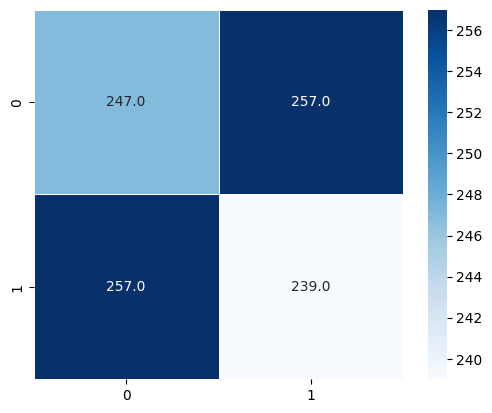

In [37]:
# Confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues')
plt.show()